# Simple Moving Average Demo

In this notebook, we will demonstrate how a simple moving average is calculated. We will plot simple moving average (SMA) lines of different periods together to show how changing the period changes the properties of the SMA.

[Moving Averages on Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simple Moving Average (SMA) Functions

In [2]:
# Calculates the average given a list of numbers.
def getAvg(data):
    total = 0
    i = 0
    while i < len(data):
        total = total + data[i]
        i = i + 1
    # Catch divide by zero errors.
    if i == 0: 
        return 0
    else:
        return total / i

    
# Produces a subset list given a list of numbers, the final 
#desired index, and the desired subset length.
def getMovingList(data, index, length):
    listEnd = index + 1
    listStart = index - length + 1
    result = data[listStart:listEnd]
    # Note that when index - length < -1, then the result will be [] (empty)
    return result


# Calculates a single average.
def getSingleSMA(data, index, sma_period):
    movingList = getMovingList(data, index, sma_period)
    average = getAvg(movingList)
    return average


# Calculates the entire list of averages.
def getSMAlist(data, sma_period):
    smaList = []
    i = 0
    while i < len(data):
        value = getSingleSMA(data, i, sma_period)
        smaList.append(value)
        i = i + 1
    return smaList


## Plotting Function

In [3]:
# Plots 3 lines: raw data, SMA(period_1), SMA(period_2)
def calculateAndPlotSMA(data, sma_period_1, sma_period_2):
    sma_1 = getSMAlist(data, sma_period_1)
    sma_2 = getSMAlist(data, sma_period_2)
    x = np.arange(len(data))
    plt.plot(x, data)
    plt.plot(x, sma_1)
    plt.plot(x, sma_2)
    sma_legend_text_1 = "SMA: " + str(sma_period_1)
    sma_legend_text_2 = "SMA: " + str(sma_period_2)
    plt.legend(['Value', sma_legend_text_1, sma_legend_text_2])
    plt.show()

## Sine Wave Function

In [4]:
# Generates a sine wave.
def generateSineWave(period, amplitude, sigma, start, end):
    # Equations
    alpha = amplitude / 2.0
    beta = 2.0 * np.pi / period
    frequency = 1.0 / period
    x = np.arange(end + 1)
    
    # Formula
    y = alpha * np.sin(beta * x) + sigma
    return y

## Result Plots

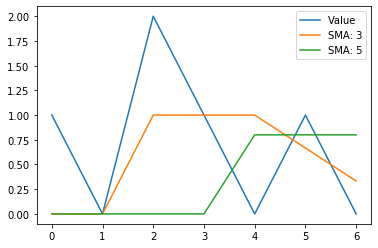

In [5]:
finalData = [1, 0, 2, 1, 0, 1, 0]
calculateAndPlotSMA(finalData, 3, 5)

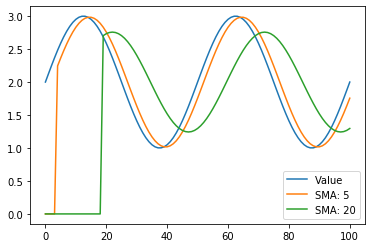

In [9]:
# Sine Wave Inputs
period = 50.0
amplitude = 2.0
sigma = 2.0
start = 0.0
end = 100.0
sineData = generateSineWave(period, amplitude, sigma, start, end)
calculateAndPlotSMA(sineData, 5, 20)

### In the above sine wave example, we can see some properties of the simple moving average.
1. Both SMA(5) and SMA(20) *lag* the value.
2. SMA(20) *lags* the value more than SMA(5)
3. Both SMA(5) and SMA(20) have a *spin-up* time at the beginning for which the value is zero.
4. SMA(20) has a longer *spin-up* time. SMA(20) can not be calculated until 20 time steps have passed.
5. SMA(20) has smaller amplitude than SMA(5). It *smooths* the Value signal more.

## Function Testing Suite

In [7]:
testData1 = [10, 5, 8, 7]

testVar1 = getSingleSMA(testData1, 3, 3)
correctAns1 = 6.666
assert abs(testVar1 - correctAns1) < 0.001

testVar2 = getSingleSMA(testData1, 0, 1)
correctAns2 = 10.0
assert abs(testVar2 - correctAns2) < 0.001

testData2 = [10, 20]
testVar3 = getAvg(testData2)
correctAns3 = 15.0
assert abs(testVar3 - correctAns3) < 0.001

testData3 = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
testVar4 = getAvg(testData3)
correctAns4 = 0.71428
assert abs(testVar4 - correctAns4) < 0.001

testVar5 = getSMAlist(testData3, 1)
correctAns5 = testData3
assert testVar5 == correctAns5

testData3 = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
testVar8 = getSMAlist(testData3, 3)
correctAns8 = [0.0, 0.0, 1.0, 1.0, 1.0, 0.666666, 0.333333]

print("ALL TESTS PASSED.")

ALL TESTS PASSED.
